In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
print(cv2.__version__)

4.8.1


# Main

(1080, 1920, 3)


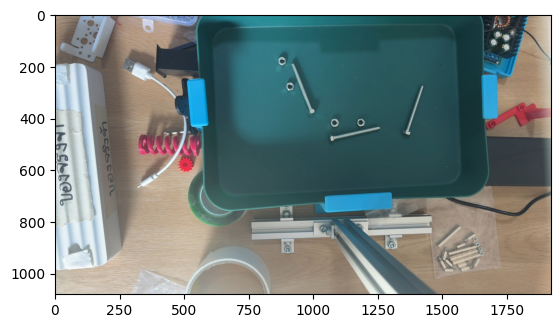

In [6]:
img = cv2.imread('src/image_12.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)
plt.imshow(img)

(555, 860, 3)


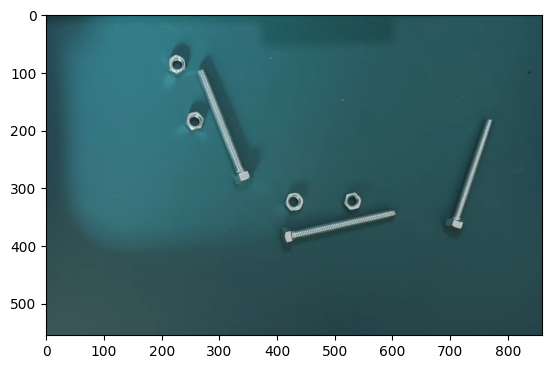

In [31]:
# determine box
img_resize = img[95:650, 650:1510]
print(img_resize.shape)
plt.imshow(img_resize)

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 3.0000e+00, 3.0000e+00,
        1.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00, 0.0000e+00,
        5.0000e+00, 4.0000e+00, 1.0000e+00, 3.0000e+00, 2.0000e+00,
        2.0000e+00, 0.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00,
        8.0000e+00, 4.0000e+00, 6.0000e+00, 6.0000e+00, 6.0000e+00,
        3.0000e+00, 6.0000e+00, 1.5000e+01, 8.0000e+00, 7.0000e+00,
        1.6000e+01, 2.7000e+01, 2.7000e+01, 4.4000e+01, 2.7000e+01,
        5.1000e+01, 6.4000e+01, 5.9000e+01, 6.9000e+01, 9.2000e+01,
        9.6000e+01, 1.2300e+02, 1.3600e+02, 1.7500e+02, 2.1500e+02,
        3.4300e+02, 4.2100e+02, 4.0200e+02, 5.4800e+02, 6.6800e+02,
        7.5700e+02, 7.6900e+02, 7.3600e+02, 1.7240e+03, 4.8940e+03,
        2.4430e+03, 8.9190e+03, 1.0395e+04, 1.3964e+04, 1.6927e+04,
        1.8005e+04, 2.3900e+04, 2.5072e+04, 1.8275e+04, 1.6284e+04,
        1.6217e+04, 1.2482e+04, 2.0960e+04, 1.41

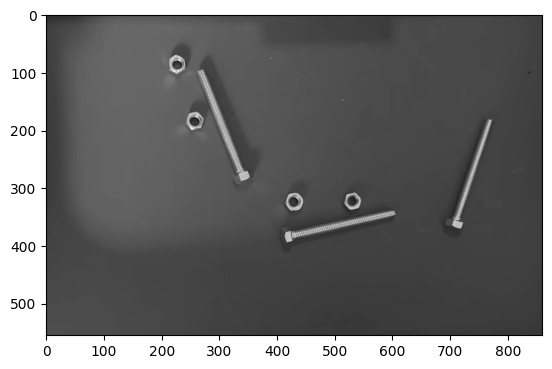

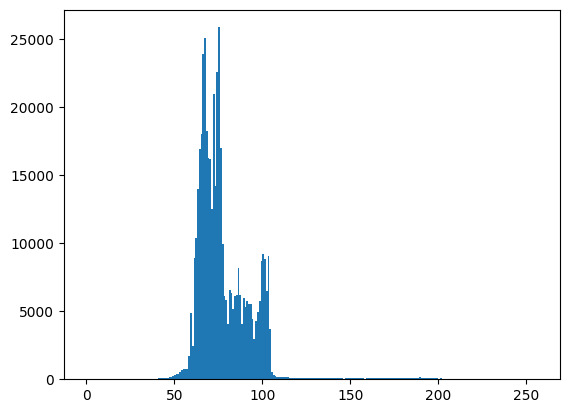

In [32]:
img_resize = cv2.cvtColor(img_resize, cv2.COLOR_RGB2GRAY)
plt.imshow(img_resize, cmap='gray')
plt.figure()
plt.hist(img_resize.ravel(), 256, [0, 256])

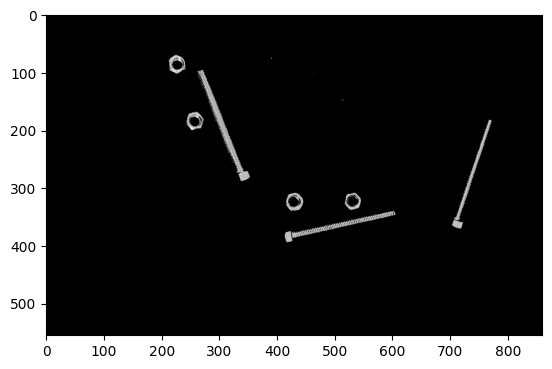

In [38]:
# threshold
_, img_tres = cv2.threshold(img_resize, 125, 255, cv2.THRESH_TOZERO)
plt.imshow(img_tres, cmap='gray')

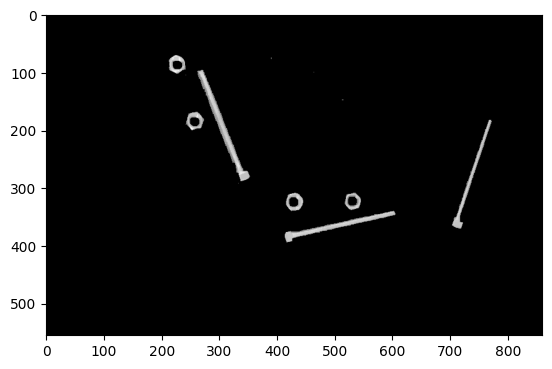

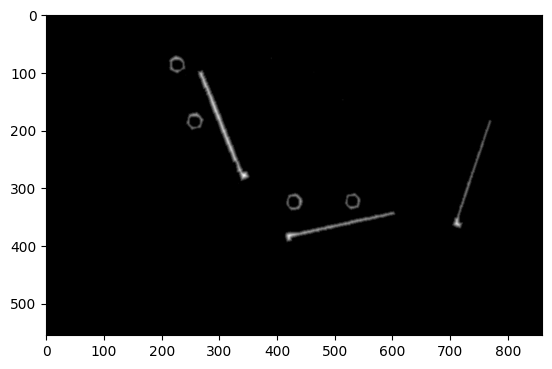

In [39]:
# closing
ksize = 7
kernel = np.ones((ksize, ksize), np.uint8)
closing = cv2.morphologyEx(img_tres,
                           cv2.MORPH_CLOSE,
                           kernel,
                           iterations=1)
plt.imshow(closing, cmap='gray')

# distance transform
dist = cv2.distanceTransform(closing, cv2.DIST_L2, 5)
cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)
plt.figure()
plt.imshow(dist, cmap='gray')

(555, 860, 3)
7
area0: 1607.5
rect0: ((508.81072998046875, 362.27630615234375), (17.461788177490234, 195.46670532226562), 75.79744720458984)
area1: 598.5
rect1: ((531.5, 323.5), (29.0, 27.0), 90.0)
area2: 684.0
rect2: ((430.3923645019531, 324.1384582519531), (30.140439987182617, 29.768335342407227), 82.87498474121094)
area3: 1164.5
rect3: ((739.1193237304688, 275.435791015625), (16.95352554321289, 195.39657592773438), 16.699243545532227)
area4: 671.5
rect4: ((257.7500305175781, 184.75), (28.460494995117188, 32.57146072387695), 18.434947967529297)
area5: 2293.5
rect5: ((304.2664489746094, 192.10317993164062), (205.50668334960938, 18.294700622558594), 66.16809844970703)
area6: 660.5
rect6: ((227.0, 86.5), (31.0, 28.0), 90.0)


/var/folders/xk/wz6j5qw9623dnjz28815491m0000gn/T/ipykernel_83083/3609829009.py:29: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


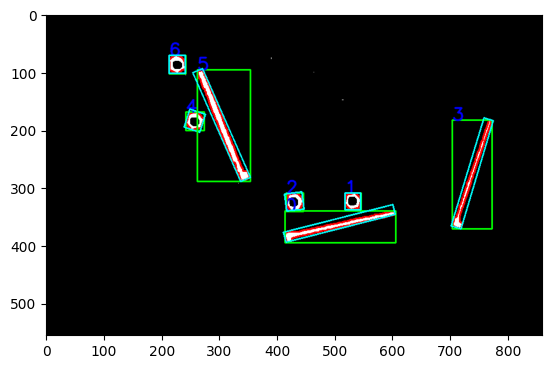

In [53]:
_,bw = cv2.threshold(closing, 0, 255, cv2.THRESH_BINARY)
mask = cv2.merge([bw, bw, bw])
# plt.imshow(mask)
print(mask.shape)

contours, _ = cv2.findContours(bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contours = [i for i in contours if cv2.contourArea(i) >= 500]

# draw contours
print(len(contours))
for i in range(len(contours)):
    a = cv2.contourArea(contours[i])
    print(f'area{i}:',a)
    cv2.drawContours(mask, contours, i, (255, 0, 0), 2)

    x, y, w, h = cv2.boundingRect(contours[i])
    cv2.rectangle(mask, (x, y), (x+w, y+h), (0, 255, 0), 2)
    bound = cv2.boundingRect(contours[i])

    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(mask, str(i), (x, y), font, 1, (0, 0, 255), 2, cv2.LINE_AA)

    # min area rect
    rect = cv2.minAreaRect(contours[i]) # (cen(x, y), (w, h), angle)
    # angle -> gripper head angle
    print(f'rect{i}:',rect)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(mask, [box], 0, (0, 255, 255), 2)

plt.figure()
plt.imshow(mask)

In [56]:
err = 10

def classify(rect):
    w, h = rect[1]
    diff = abs(w-h)

    if diff < err:
        return 'nut'
    elif diff > err:
        return 'screw'
    else:
        return 'unknown'

# classify
for i in range(len(contours)):
    rect = cv2.minAreaRect(contours[i])
    print(f'obj{i}:', classify(rect))

obj0: screw
obj1: nut
obj2: nut
obj3: screw
obj4: nut
obj5: screw
obj6: nut


/var/folders/xk/wz6j5qw9623dnjz28815491m0000gn/T/ipykernel_83083/216812748.py:8: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


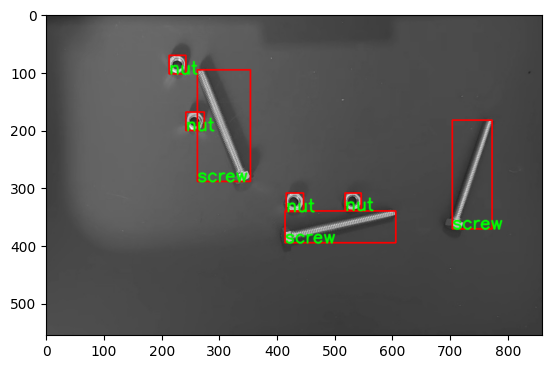

In [57]:
img2 = cv2.merge([img_resize, img_resize, img_resize])
for i in range(len(contours)):
    x, y, w, h = cv2.boundingRect(contours[i])
    cv2.rectangle(img2, (x, y), (x+w, y+h), (255, 0, 0), 2)

    rect = cv2.minAreaRect(contours[i])
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.putText(img2, classify(rect), (x, y+h), font, 1, (0,255,0), 2, cv2.LINE_AA)

plt.imshow(img2, cmap='gray')

### To Do
0. looping until 0 unknown - oscillated tray
1. watershed lines - identify overlapped object
2. overlap check